# Section by Bradley - Correlations, Distributions & Group Comparisons 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from pathlib import Path

load data

In [4]:
data_path = Path('../data/final/final_dataset.csv')
education = pd.read_csv(data_path)

print("Dataset Loaded Successfully")
print("Shape:", education.shape)
education.head()


Dataset Loaded Successfully
Shape: (12424, 18)


,ActiveLearner,Age,AssignmentCompletion,Attendance,Discussions,EduTech,ExamScore,Extracurricular,FinalGrade,Gender,Internet,LearningStyle,Motivation,OnlineCourses,PassStatus,Resources,StressLevel,StudyHours
0,No,19.0,59.0,64.0,1,<Na>,40.0,No,D,Female,Yes,2,Low,8.0,Fail,Medium,1,19.0
1,No,23.0,90.0,64.0,<Na>,<Na>,66.0,No,C,Female,Yes,3,Low,16.0,Pass,Medium,1,19.0
2,No,28.0,67.0,64.0,<Na>,1,99.0,No,A,Female,Yes,1,Low,19.0,Pass,Medium,1,19.0
3,Yes,19.0,59.0,64.0,1,<Na>,40.0,Yes,D,Female,Yes,2,Low,8.0,Fail,Medium,1,19.0
4,Yes,23.0,90.0,64.0,<Na>,<Na>,66.0,Yes,C,Female,Yes,3,Low,16.0,Pass,Medium,1,19.0


## Correlation of numeric columns

In [5]:
#correlation matrix using only numeric columns

numeric_education = education.select_dtypes(include=[np.number])
corr = numeric_education.corr()
print(corr)

                           Age  AssignmentCompletion  Attendance  ExamScore  \
Age                   1.000000             -0.011570   -0.044502  -0.008413   
AssignmentCompletion -0.011570              1.000000   -0.001346   0.027585   
Attendance           -0.044502             -0.001346    1.000000  -0.013149   
ExamScore            -0.008413              0.027585   -0.013149   1.000000   
OnlineCourses         0.003561              0.011016    0.006693   0.020605   
StudyHours           -0.000306              0.008174    0.022503   0.003856   

                      OnlineCourses  StudyHours  
Age                        0.003561   -0.000306  
AssignmentCompletion       0.011016    0.008174  
Attendance                 0.006693    0.022503  
ExamScore                  0.020605    0.003856  
OnlineCourses              1.000000   -0.003399  
StudyHours                -0.003399    1.000000  


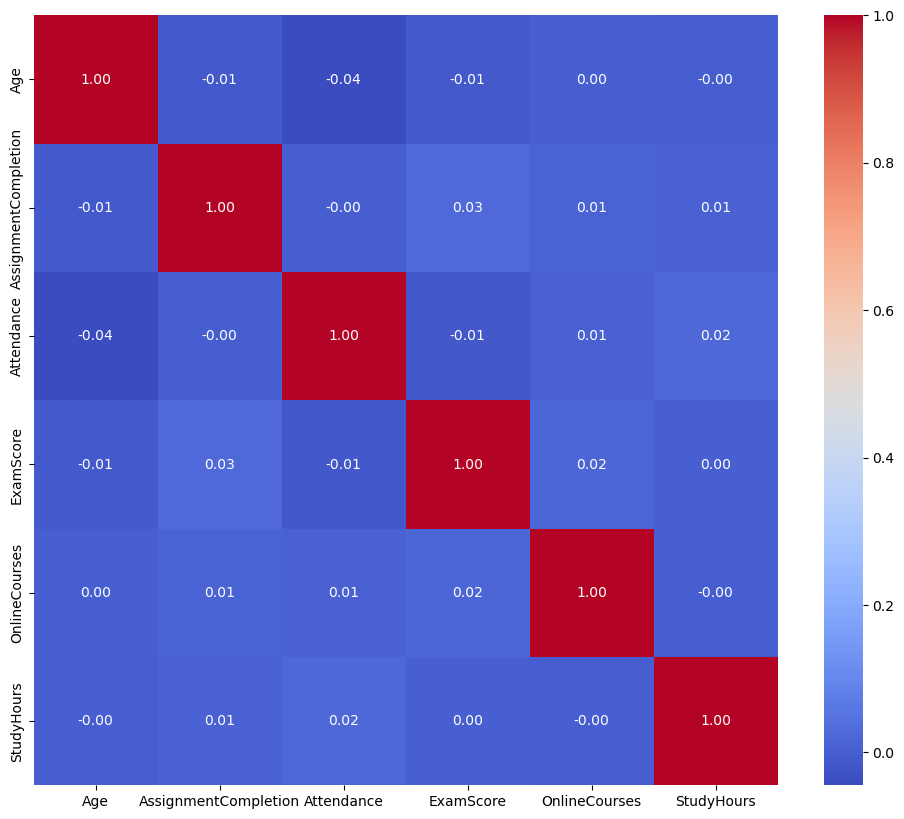

In [6]:
#plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [7]:
# show highest correlations
corr_unstacked = corr.unstack()
sorted_corr = corr_unstacked.sort_values(kind="quicksort", ascending=False)
print("Highest correlations:\n", sorted_corr[sorted_corr < 1].head(10))

Highest correlations:
 AssignmentCompletion  ExamScore               0.027585
ExamScore             AssignmentCompletion    0.027585
Attendance            StudyHours              0.022503
StudyHours            Attendance              0.022503
ExamScore             OnlineCourses           0.020605
OnlineCourses         ExamScore               0.020605
AssignmentCompletion  OnlineCourses           0.011016
OnlineCourses         AssignmentCompletion    0.011016
AssignmentCompletion  StudyHours              0.008174
StudyHours            AssignmentCompletion    0.008174
dtype: float64


This plot shows the correlation of the numerical columns ; ['Age', 'AssignmentCompletion', 'Attendance', 'ExamScore', 'OnlineCourses', 'StudyHours']

## Distributions 

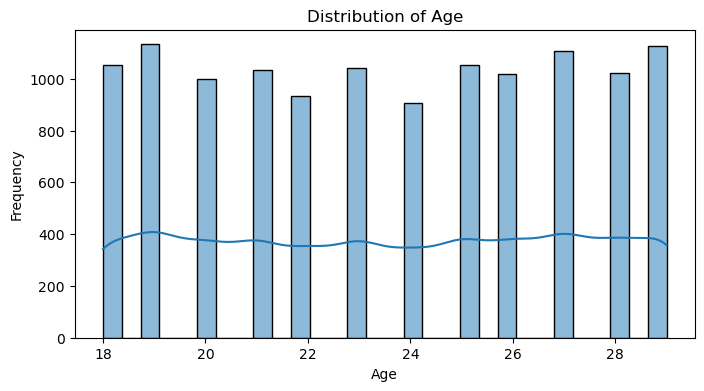

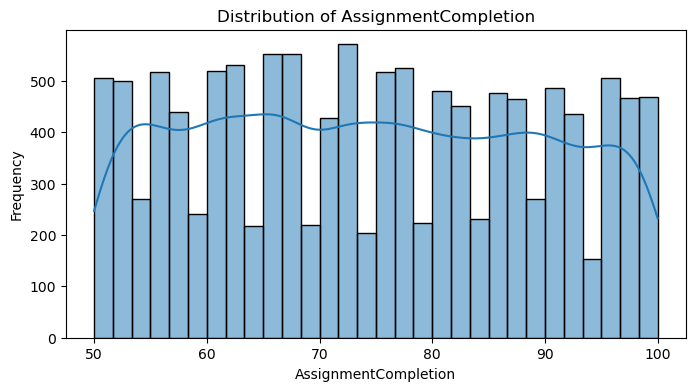

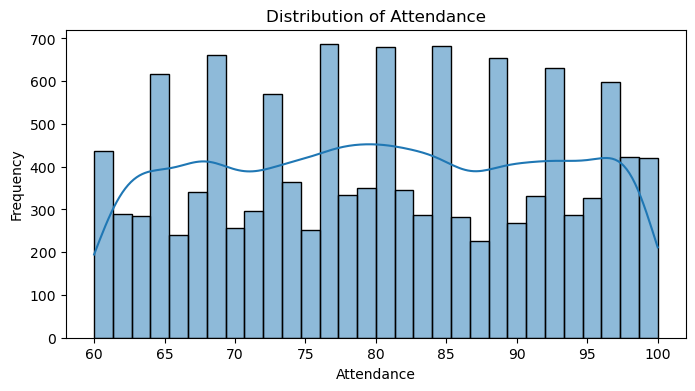

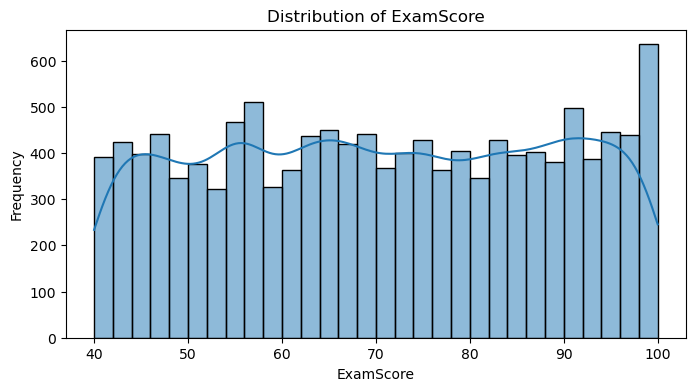

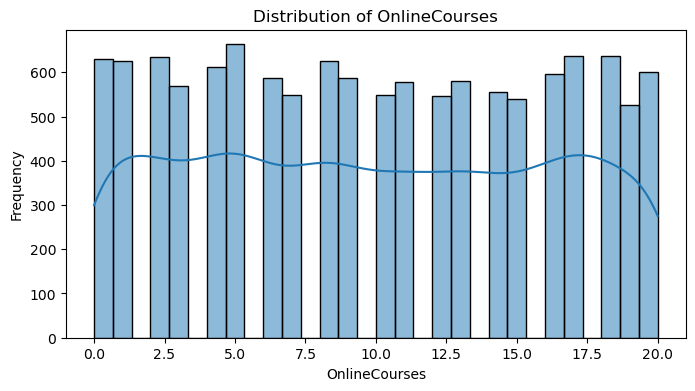

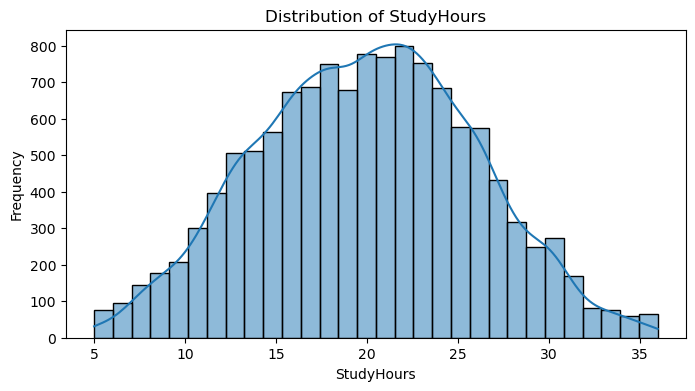

In [8]:
# drstirubutions
numeric_cols = numeric_education.columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(numeric_education[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    

## Group Comparisons

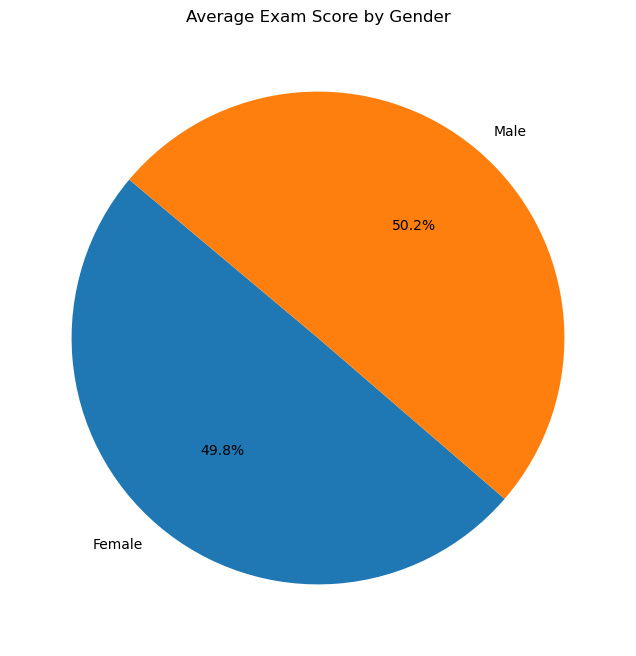

In [9]:
#group comparisons
grouped_by_gender = education.groupby('Gender')['ExamScore'].mean().reset_index()
#pie chart
plt.figure(figsize=(8, 8))
plt.pie(grouped_by_gender['ExamScore'], labels=grouped_by_gender['Gender'], autopct='%1.1f%%', startangle=140)
plt.title('Average Exam Score by Gender')
plt.show()

In [10]:
#make age groups
group_by_age_group = education.copy()
bins = [16, 19, 22, 25, 30, np.inf]
labels = ['17-19', '20-22', '23-25', '26-30', '31+']
group_by_age_group['AgeGroup'] = pd.cut(group_by_age_group['Age'], bins=bins, labels=labels)

# mean exam score by age group
grouped_by_age_group = group_by_age_group.groupby('AgeGroup')['ExamScore'].mean().reset_index()

print(grouped_by_age_group.sort_values(by='AgeGroup'))

  AgeGroup  ExamScore
0    17-19  70.562929
1    20-22  70.094772
2    23-25  70.533845
3    26-30  70.168421
4      31+        NaN


C:\Users\sammi\AppData\Local\Temp\ipykernel_7800\3075337269.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_by_age_group = group_by_age_group.groupby('AgeGroup')['ExamScore'].mean().reset_index()


posx and posy should be finite values
posx and posy should be finite values


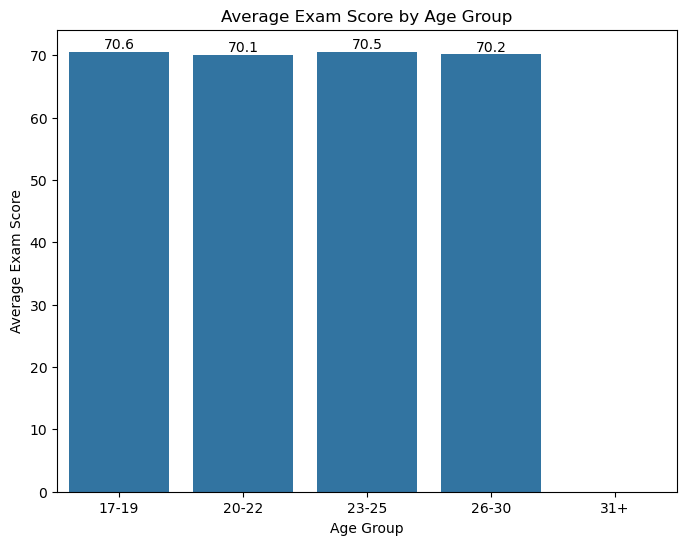

In [11]:
#plot average exam score by age group

plt.figure(figsize=(8, 6))
sns.barplot(x='AgeGroup', y='ExamScore', data=grouped_by_age_group, order=labels)

# add data points for age groups on the bars
for i, score in enumerate(grouped_by_age_group['ExamScore']):
    plt.text(i, score + 0.5, f'{score:.1f}', ha='center')

plt.title('Average Exam Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Exam Score')
plt.show()

Exams Score by Stress level

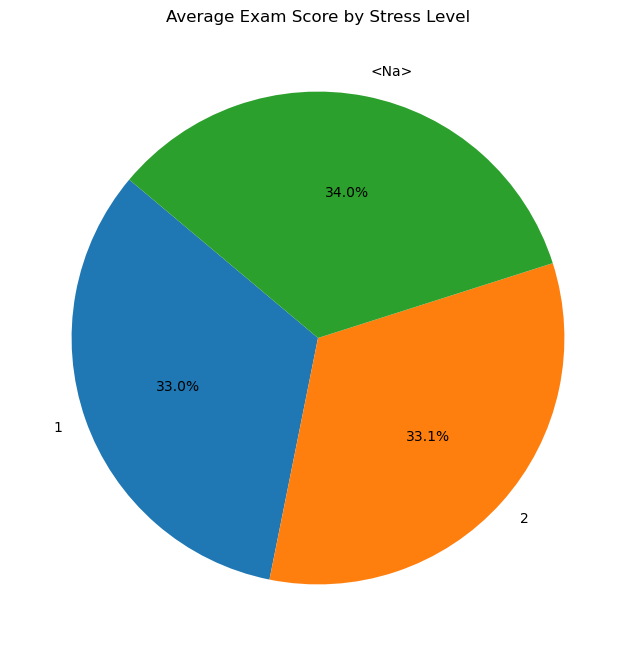

In [12]:
## group comparisons by Stress Level
group_by_stress = education.groupby('StressLevel')['ExamScore'].mean().reset_index()
#pie chart
plt.figure(figsize=(8, 8))
plt.pie(group_by_stress['ExamScore'], labels=group_by_stress['StressLevel'], autopct='%1.1f%%', startangle=140)
plt.title('Average Exam Score by Stress Level')
plt.show()

C:\Users\sammi\AppData\Local\Temp\ipykernel_7800\2536215934.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='EduTech', y='ExamScore', data=education, inner='quartile', palette='Set2')


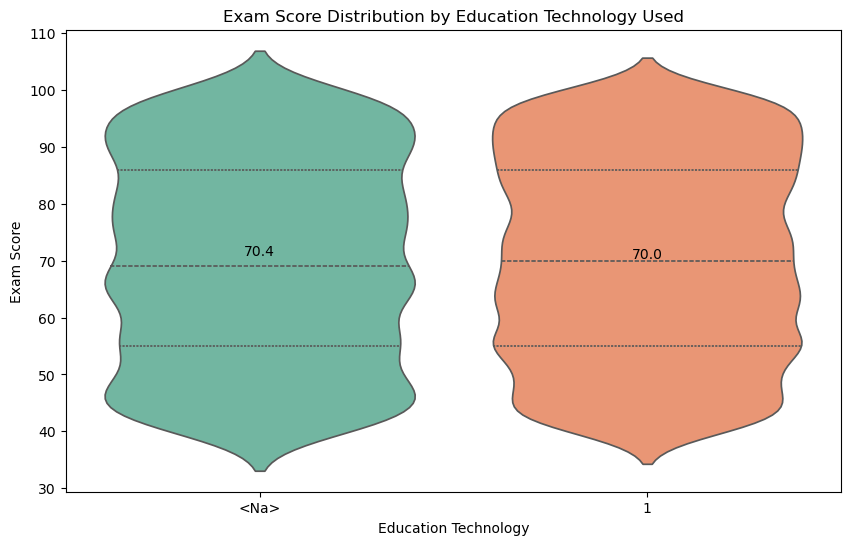

In [13]:
# group by Education tech by examscore
group_by_edutech = education.groupby('EduTech')['ExamScore'].mean().reset_index()

# make violin plot

plt.figure(figsize=(10, 6))
sns.violinplot(x='EduTech', y='ExamScore', data=education, inner='quartile', palette='Set2')


#add data values
for i, tech in enumerate(group_by_edutech['EduTech']):
    score = group_by_edutech[group_by_edutech['EduTech'] == tech]['ExamScore'].values[0]
    plt.text(i, score + 0.5, f'{score:.1f}', ha='center')


plt.title('Exam Score Distribution by Education Technology Used')
plt.xlabel('Education Technology')
plt.ylabel('Exam Score')
plt.show()

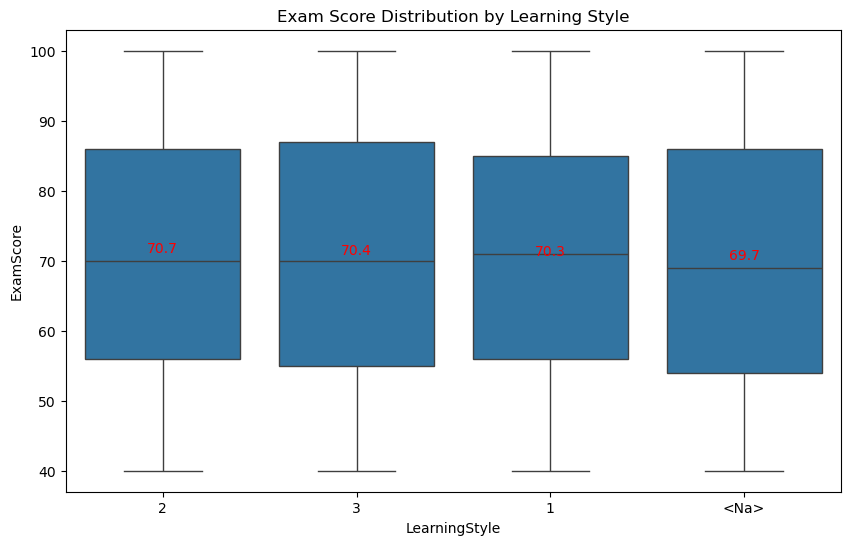

In [14]:
##learning styles comparisons
group_by_learning_style = education.groupby('LearningStyle')['ExamScore'].mean().reset_index()

# box plot for learning styles
plt.figure(figsize=(10, 6))
sns.boxplot(x='LearningStyle', y='ExamScore', data=education)
#add data points for learning styles on the boxplot
for i, style in enumerate(group_by_learning_style['LearningStyle']):
    mean_score = group_by_learning_style[group_by_learning_style['LearningStyle'] == style]['ExamScore'].values[0]
    plt.text(i, mean_score + 0.5, f'{mean_score:.1f}', ha='center', color='red')
plt.title('Exam Score Distribution by Learning Style')
plt.show()